In [1]:
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.models import GeoJSONDataSource, Patches, LinearColorMapper, ColorBar
from bokeh.palettes import Greens9
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

from data import get_merged_data, get_geo_data

output_notebook()

Loading BokehJS ...

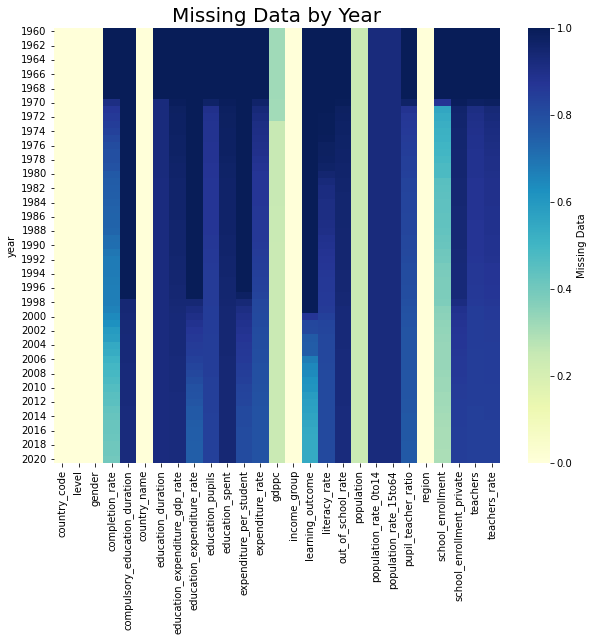

In [2]:
df = get_merged_data(from_year=1960, year_as_datetime=False)
years = df.year.copy()
df_isna = df.isna()
df_isna.year = years
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Missing Data by Year', size=20)
sns.heatmap(data=df_isna.groupby('year').mean(),
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'})
plt.show()

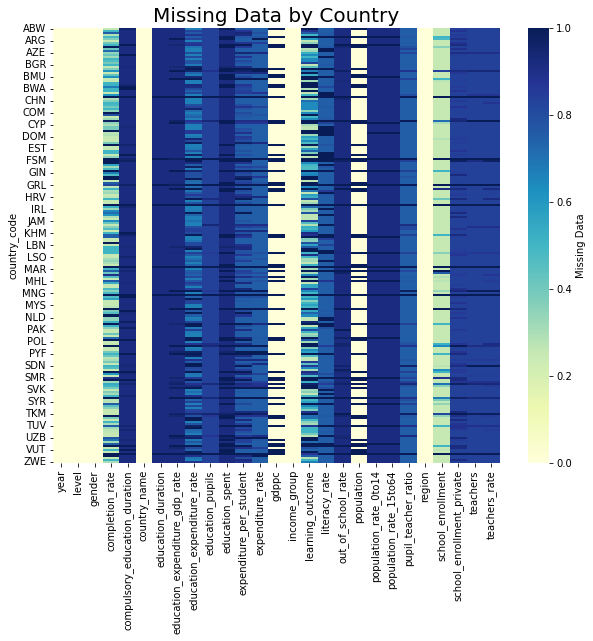

In [3]:
df = get_merged_data(from_year=2000, year_as_datetime=False)
country_codes = df.country_code.copy()
df_isna = df.isna()
df_isna.country_code = country_codes
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Missing Data by Country', size=20)
sns.heatmap(data=df_isna.groupby('country_code').mean(),
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'})
plt.show()

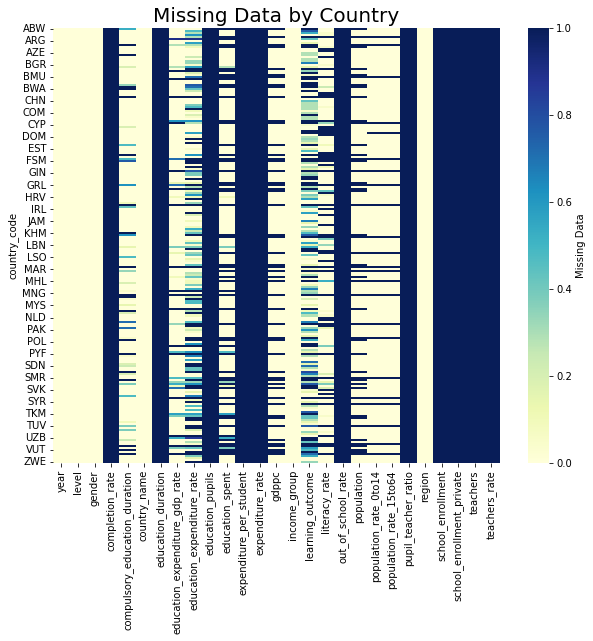

In [4]:
df = get_merged_data(from_year=2000, year_as_datetime=False)
df = df[(df.level == 'total') & (df.gender == 'total')]
country_codes = df.country_code.copy()
df_isna = df.isna()
df_isna.country_code = country_codes
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Missing Data by Country', size=20)
sns.heatmap(data=df_isna.groupby('country_code').mean(),
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'})
plt.show()

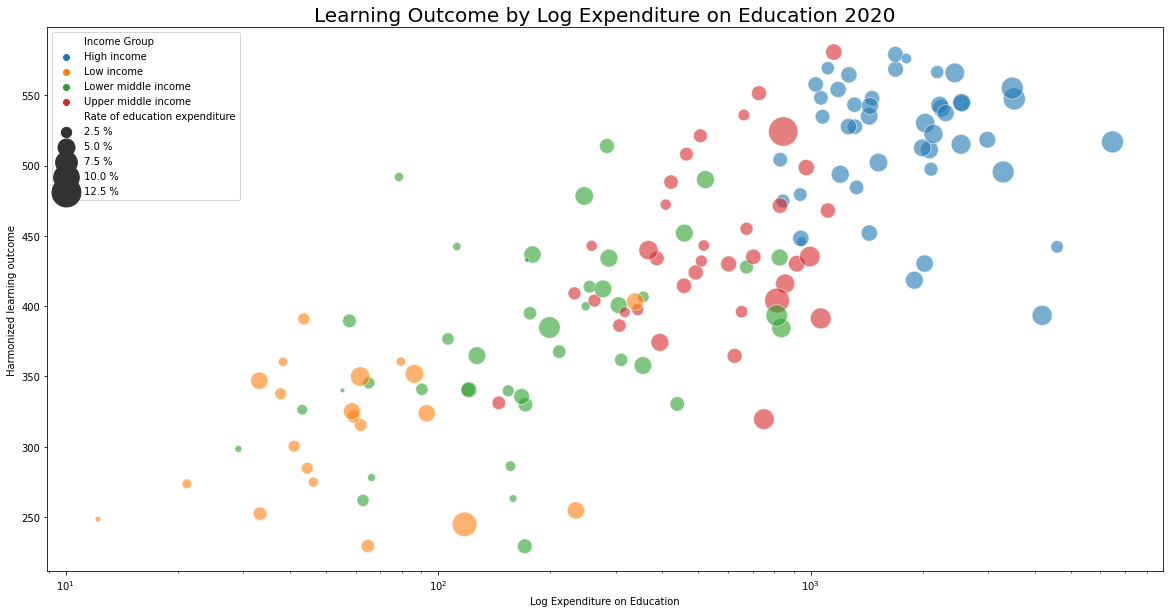

In [10]:
df = get_merged_data()
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Learning Outcome by Log Expenditure on Education 2020', size=20)
ax.set_xlabel('Log Expenditure on Education')
ax.set_xscale('log')
ax.set_ylabel('Harmonized learning outcome')
sns.scatterplot(
    data=df[(df.level == 'total') & (df.gender == 'total') & (df.year == datetime(2020, 1, 1))],
    x='education_spent',
    y='learning_outcome',
    hue='income_group',
    size='education_expenditure_gdp_rate',
    alpha=0.6,
    sizes=(10, 1000))
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'Income Group'
labels[5] = 'Rate of education expenditure'
labels[6:] = [name + ' %' for name in labels[6:]]
ax.legend(handles, labels)
plt.show()

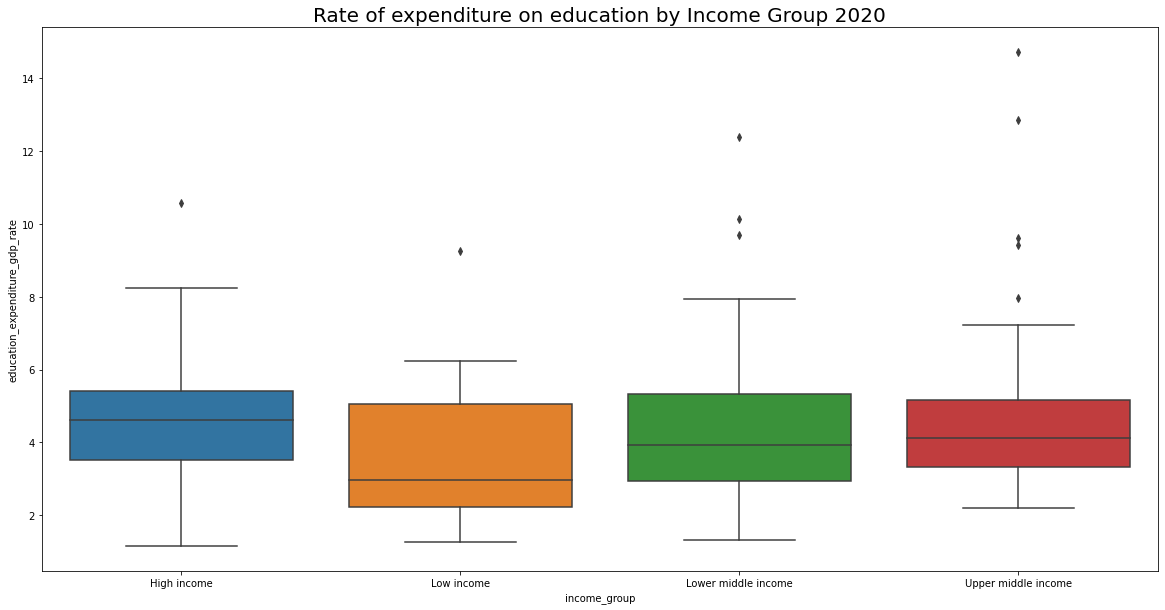

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Rate of expenditure on education by Income Group 2020', size=20)
ax.set_xlabel('Income Group')
ax.set_ylabel('Rate of education expenditure')
sns.boxplot(
    data=df[(df.level == 'total') & (df.gender == 'total') & (df.year == datetime(2020, 1, 1))],
    x='income_group',
    y='education_expenditure_gdp_rate')
plt.show()

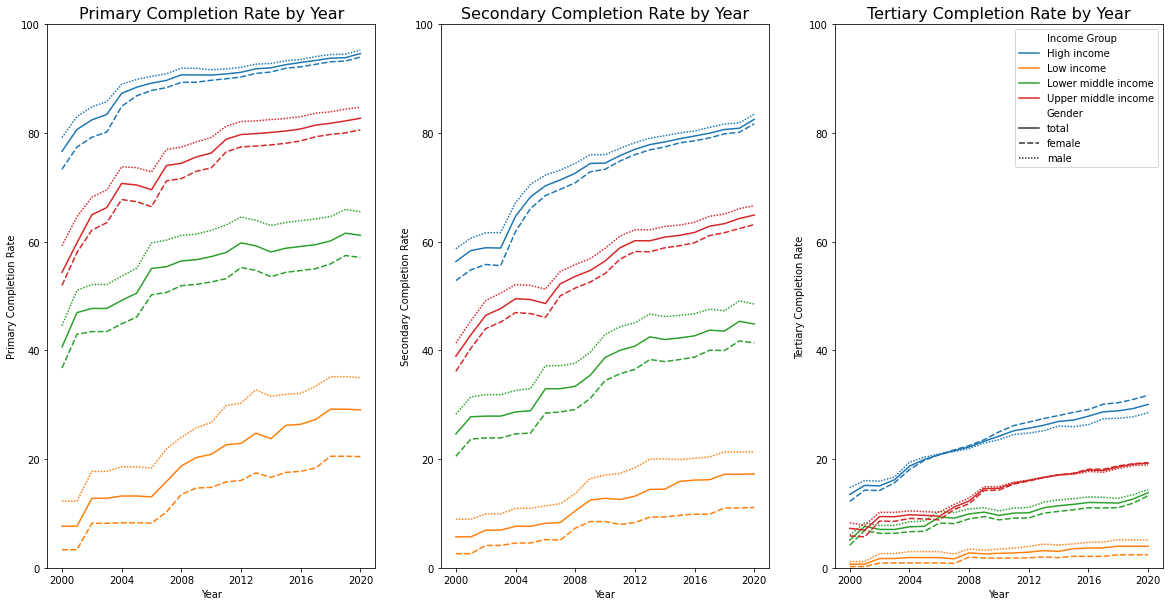

In [ ]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=3)
legend = False
for i, level in enumerate(['primary', 'secondary', 'tertiary']):
    if level == 'tertiary':
        legend='auto'
    sns.lineplot(
        data=df[(df.level == level)].groupby(['year', 'income_group', 'gender']).mean().reset_index(),
        x='year',
        y='completion_rate',
        style='gender',
        hue='income_group',
        style_order=['total', 'female', 'male'],
        legend=legend,
        ax=axs[i])
    axs[i].set_title(f'{level.capitalize()} Completion Rate by Year', size=16)
    axs[i].set_ylim((0, 100))
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel(f'{level.capitalize()} Completion Rate')
    if legend:
        handles, labels = axs[i].get_legend_handles_labels()
        labels[0] = 'Income Group'
        labels[5] = 'Gender'
        axs[i].legend(handles, labels)
plt.show()

In [ ]:
geo_data = get_geo_data()
df = get_merged_data()
df = df[(df.level == 'total') & (df.gender == 'total') & (df.year == datetime(2020, 1, 1))].set_index('country_code').literacy_rate
geo_data = geo_data.join(df)
geo_source = GeoJSONDataSource(geojson=geo_data.to_json())

choropleth = figure(
    plot_width=900, 
    plot_height=500,
    toolbar_location=None,
    x_axis_location=None,
    y_axis_location=None)
choropleth.grid.visible = False
choropleth.title.text = 'Literacy Rate by Country'
choropleth.title.align = 'center'
choropleth.title.text_font_size = '20px'


color_mapper = LinearColorMapper(
    palette=list(reversed(Greens9)),
    low=0,
    high=100)

patches = Patches(
    xs="xs", ys="ys",
    fill_alpha=0.7, 
    fill_color={'field': 'literacy_rate', 'transform': color_mapper},
    line_color='white', 
    line_width=0.3)
choropleth.add_glyph(geo_source, patches)

color_bar = ColorBar(
    color_mapper=color_mapper,
    location="bottom_left", orientation="horizontal",
    title="Literacy Rate",
    title_text_font_size="14px", title_text_font_style="bold",
    background_fill_alpha=0.0)
choropleth.add_layout(color_bar)

show(choropleth)